In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

pd.pandas.set_option('display.max_columns', None)

In [2]:
dataset=pd.read_csv('feature_enginnering_data.csv')

In [3]:
dataset.head()

,active_cust,income,expenditure,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
0,0,1586,1268.8,85,4,1,0,121,4,85
1,0,1581,1264.8,85,4,1,0,133,4,85
2,0,1594,1275.2,82,4,1,0,118,4,85
3,0,1594,1275.2,82,4,1,0,123,4,85
4,1,1609,1287.2,80,4,1,0,177,4,85


In [4]:
y_train=dataset[['active_cust']]

In [5]:
X_train=dataset.drop(['active_cust'],axis=1)

## Using Lasso Regression

In [6]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [7]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [8]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [9]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 9
selected features: 9


## Using Decision Trees

In [10]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()

In [11]:
model.fit(X_train,y_train)

<ipython-input-11-b7a8c64777c1>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


ExtraTreesRegressor()

In [12]:
print(model.feature_importances_)

[0.09429186 0.13321499 0.08423102 0.01421176 0.11339957 0.14731896
 0.12495328 0.06509188 0.22328668]


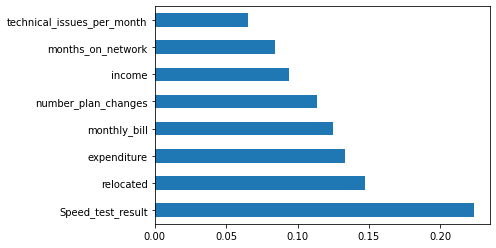

In [13]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

## Using Correlations

In [14]:
import seaborn as sns

<AxesSubplot:>

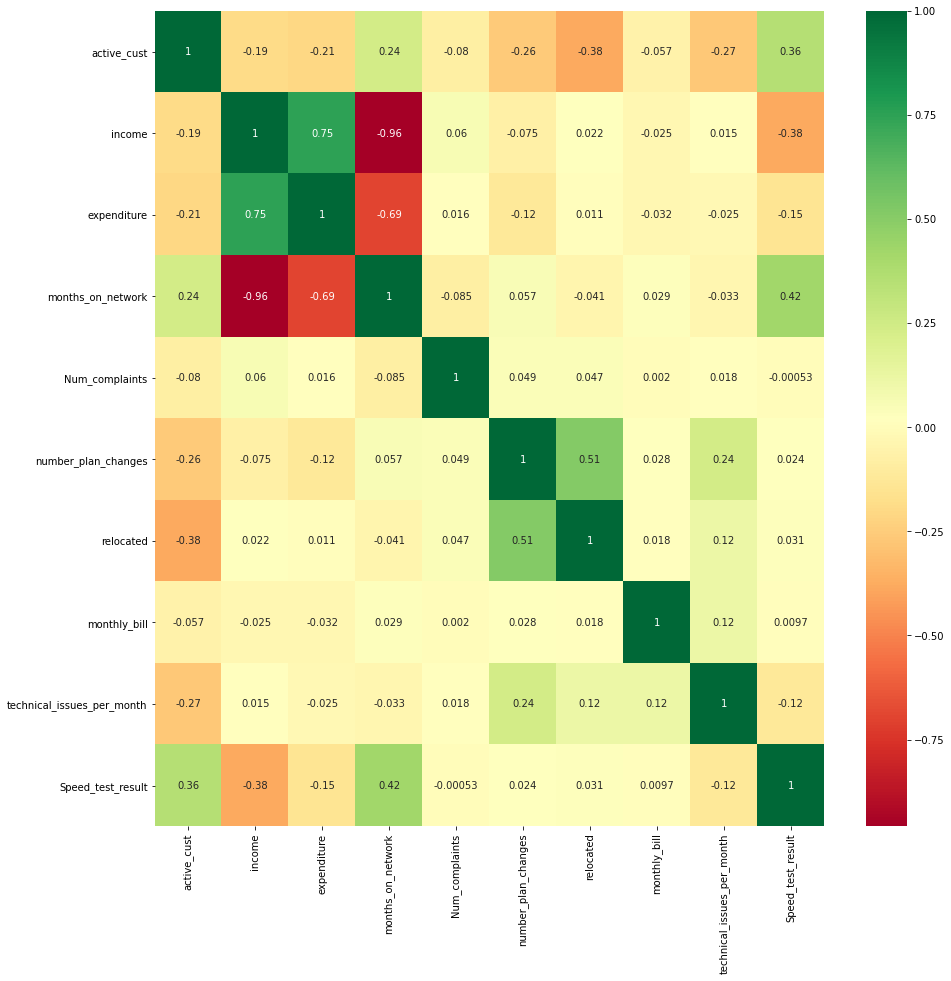

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(dataset.corr(),annot=True,cmap="RdYlGn")

In [16]:
dataset.corr()

,active_cust,income,expenditure,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
active_cust,1.000000,-0.191436,-0.208210,0.236291,-0.079815,-0.259185,-0.382879,-0.057122,-0.267463,0.356696
income,-0.191436,1.000000,0.751597,-0.958353,0.060055,-0.075137,0.022002,-0.025169,0.015200,-0.377048
expenditure,-0.208210,0.751597,1.000000,-0.692769,0.016026,-0.119734,0.011099,-0.032484,-0.024700,-0.146860
months_on_network,0.236291,-0.958353,-0.692769,1.000000,-0.084942,0.056603,-0.041063,0.028637,-0.032965,0.424613
Num_complaints,-0.079815,0.060055,0.016026,-0.084942,1.000000,0.048550,0.046558,0.002002,0.017529,-0.000527
number_plan_changes,-0.259185,-0.075137,-0.119734,0.056603,0.048550,1.000000,0.511149,0.028083,0.236912,0.023911
relocated,-0.382879,0.022002,0.011099,-0.041063,0.046558,0.511149,1.000000,0.017906,0.116634,0.031408
monthly_bill,-0.057122,-0.025169,-0.032484,0.028637,0.002002,0.028083,0.017906,1.000000,0.117081,0.009714
technical_issues_per_month,-0.267463,0.015200,-0.024700,-0.032965,0.017529,0.236912,0.116634,0.117081,1.000000,-0.122083
Speed_test_result,0.356696,-0.377048,-0.146860,0.424613,-0.000527,0.023911,0.031408,0.009714,-0.122083,1.000000


In [17]:
dataset = dataset.drop('income',axis=1)

In [18]:
dataset.head()

,active_cust,expenditure,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
0,0,1268.8,85,4,1,0,121,4,85
1,0,1264.8,85,4,1,0,133,4,85
2,0,1275.2,82,4,1,0,118,4,85
3,0,1275.2,82,4,1,0,123,4,85
4,1,1287.2,80,4,1,0,177,4,85


In [19]:
dataset.shape

(98666, 9)

<AxesSubplot:>

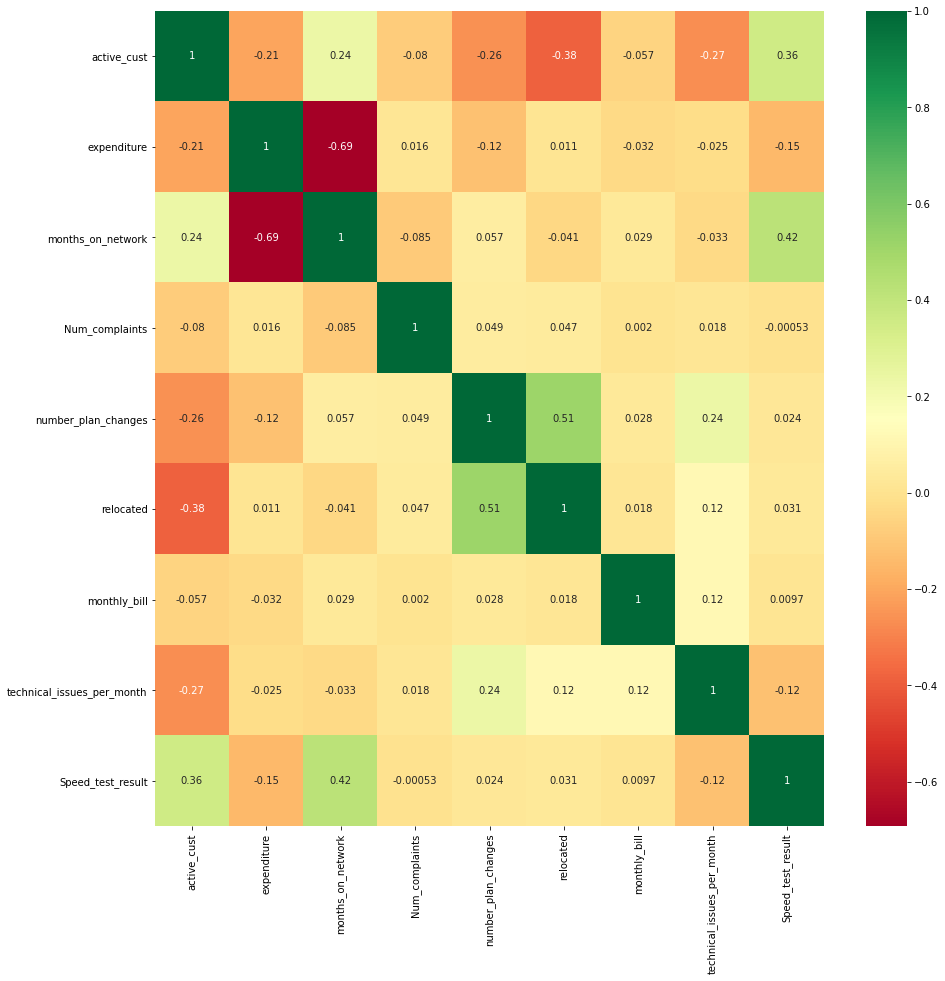

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(dataset.corr(),annot=True,cmap="RdYlGn")

In [34]:
dataset.to_csv('feature_selected_data.csv',index=False)

## Using Information Gain

In [21]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

c:\users\samrat\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0.07032499, 0.08548389, 0.0683818 , 0.01368841, 0.08701448,
       0.08206756, 0.00092981, 0.04656604, 0.10501243])

In [22]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Speed_test_result             0.105012
number_plan_changes           0.087014
expenditure                   0.085484
relocated                     0.082068
income                        0.070325
months_on_network             0.068382
technical_issues_per_month    0.046566
Num_complaints                0.013688
monthly_bill                  0.000930
dtype: float64

<AxesSubplot:>

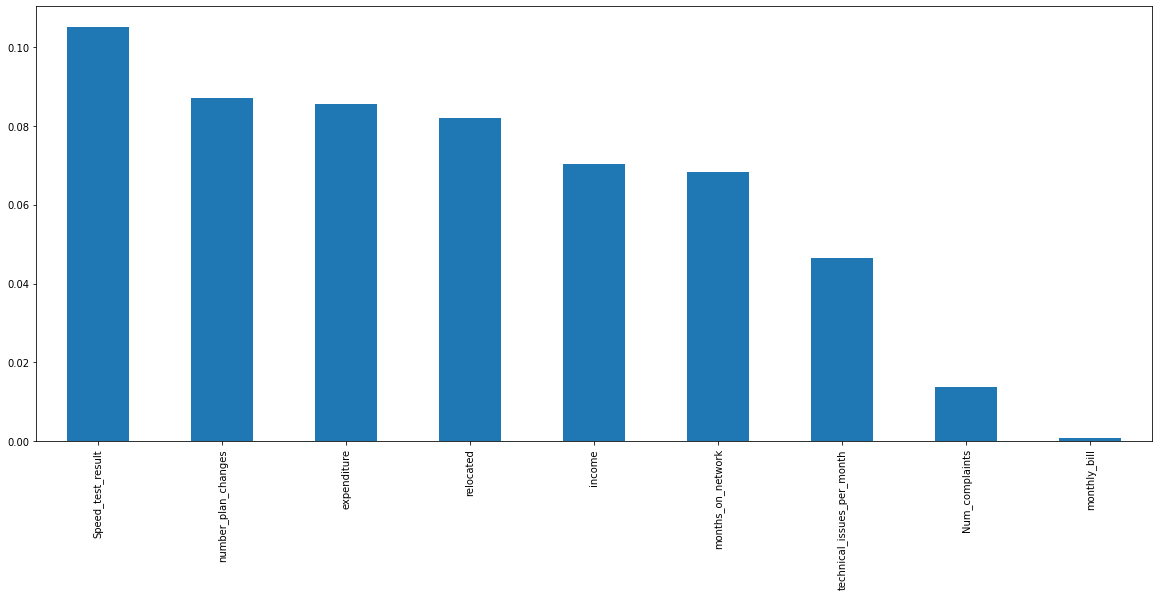

In [23]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [24]:
from sklearn.feature_selection import SelectKBest

In [25]:
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

c:\users\samrat\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Index(['income', 'expenditure', 'number_plan_changes', 'relocated',
       'Speed_test_result'],
      dtype='object')

## Using Chi2 test

In [26]:
categorical_features = [feature for feature in dataset.columns if len(dataset[feature].unique())<25]

In [27]:
categorical_features

['active_cust',
 'Num_complaints',
 'number_plan_changes',
 'relocated',
 'technical_issues_per_month']

In [28]:
categorical_features.remove('active_cust')

In [29]:
df = dataset[categorical_features].copy()

In [30]:
df.head()

,Num_complaints,number_plan_changes,relocated,technical_issues_per_month
0,4,1,0,4
1,4,1,0,4
2,4,1,0,4
3,4,1,0,4
4,4,1,0,4


In [31]:
from sklearn.feature_selection import chi2
f_p_values=chi2(df,dataset['active_cust'])

In [32]:
f_p_values

(array([1.24341553e+01, 7.09707493e+03, 1.26648753e+04, 3.32459419e+03]),
 array([0.00042155, 0.        , 0.        , 0.        ]))

In [36]:
p_values=pd.Series(f_p_values[1])
p_values.index=df.columns
p_values

Num_complaints                0.000422
number_plan_changes           0.000000
relocated                     0.000000
technical_issues_per_month    0.000000
dtype: float64

In [37]:
p_values.sort_index(ascending=False)

technical_issues_per_month    0.000000
relocated                     0.000000
number_plan_changes           0.000000
Num_complaints                0.000422
dtype: float64